## Energy Bar Charts:

### ENGR 212

##### Why?

Energy bar charts are core tool for visualizing work-energy problems. This current version of the tool is interactive and includes kinetic energy initial and final), gravitational potential energy (initial and final), spring potential energy (initial and final), an unnamed potential energy (initial and final) as well as two possible non conservative forces doing work through the process. There is a final net energy bar that seeks to indicate the balance of all the energy 'flows'. 

### Version 4: Changes

Because bar graphs show up as a framework in energy problems as well as momentum problems. Pedagogically one can imagine different versions of these tools depending on where the discussion is at the moment. I have this idea I should be able to make it easier to change from one version to another. This involves being more clear on a scheme for possible bar labels and perhaps two lists - one for energy and one for momentum. Feels a little fussy given that the basic concept works but it's something to think about.

### Libraries

There are a number of different widget libraries. In the end the ipywidgets was most adaptable to my purposes. I suspect this would change if I were seeking to build this tool as a webpage. References that I used in sorting this all out are given in my [InteractiveStudy notebook](https://github.com/smithrockmaker/ENGR212/blob/main/InteractiveStudy.ipynbhttps://github.com/smithrockmaker/ENGR212/blob/main/InteractiveStudy.ipynb). At the moment (2/21) this is miserably documented but the references contained therein are much better if they are still live.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, Layout


### Setting Up the Bar Graph

This is where the decisions about how many bars and how they will be labelled are made. In the end I opted to create an enormous text str to label the bars which the barLabels. The locate  and locateShift lists articulate x values (locations) for each of the bar. This involves skipping values to leave space for the vertical dividers that help this all make sense to me conceptually.


In [24]:
# set up locations for bars and other objects
# start with how many of each bar
initialBars = 1
transBars = 4
finalBars = initialBars

# total number of bars that are interactive. Gaps and other spacing issues handled at end of cell
Nbase = initialBars + transBars + finalBars + 4
locate = np.arange(Nbase+1) 

# shifted locations for labels
locateShift = locate - 0.4

# the x locations for the groups
# Having them in separate lists allows me to choose different colors for each section
# of the bar graph more easily (without creating a color list that I need to edit)
initialLoc = locate[0:initialBars]
transLoc = locate[initialBars+1: initialBars + transBars +1]
finalLoc = locate[Nbase-(finalBars + 2):Nbase-2]
vlineLoc = [initialBars, (initialBars + transBars +1)]
vline2Loc = [Nbase - 2]
netLoc = [Nbase-1]

# check alignments --  I had a lot of trouble making sure that everything lined up
# appropriately. These are diagnostic print statements to be sure I'm visualizing
# the bar and divider locations correctly.
#print("Initial Bars:",initialLoc)
#print("Add/Remove Bars:",transLoc)
#print("Final Bars Bars:",finalLoc)
#print("dividers:",vlineLoc)
#print("Net Separator:",vline2Loc)
#print("Net Bar:",netLoc)
#print("locate:",locate)

# Structure bar width - this is a proportional value apparently
# it scales with plot figure size.
width = 0.4

#  more adaptable bar labels
lSpace = ' '
lScale = 5
separator = lScale*lSpace
labelInitial = ['KE','PEg','PEs','U']
labelTrans = ['W1','W2','W3','W4',]
labelFinal = labelInitial
labelNet = 'net = ' # does everything add up?
vertBar = ''


print(labelInitial[0:initialBars])

# bar labels
#labelKEi = 'KE' # initial 
#labelPEgi = 'PEg' # initial 
#labelPEsi = 'PEs' # initial 
#labelUKi = 'U' # unknown source of energy initial
#labelPM1 = 'W1' # unknown source of energy added or lost during process
#labelPM2 = 'W2' # unknown source of energy added or lost during process
#labelKEf = 'KE' # final
#labelPEgf = 'PEg' # final
#labelPEsf = 'PEs' # final
#labelUKf = 'U' # unknown source of energy final
#labelNet = 'net = ' # does everything add up?
#vertBar = ''
#lSpace = '  '
#lScale = 5

# assemble labels for each section. Spacing is most easily adjusted using the lScale variabkel above
initialLabels = separator.join(labelInitial[0:initialBars])
transLabels = separator.join(labelTrans[0:transBars])
finalLabels = separator.join(labelFinal[0:finalBars])
netLabels = labelNet
#initialLabels = labelKEi + lScale*lSpace + labelPEgi + lScale*lSpace +labelPEsi + lScale*lSpace +labelUKi + (lScale+2)*lSpace
#transLabels = labelPM1 + lScale*lSpace + labelPM2 + (lScale+1)*lSpace
#finalLabels = labelKEf + lScale*lSpace + labelPEgf + lScale*lSpace + labelPEsf + lScale*lSpace + labelUKf + (lScale+2)*lSpace
#netLabels = labelNet
#vertLabel = vertBar

# put it all together for labels
barLabels = initialLabels + separator + transLabels + separator + finalLabels +separator + netLabels

# check the label string if needed.
print("barLabels:", barLabels)

['KE']
barLabels: KE     W1     W2     W3     W4     KE     net = 


### Energy Bar Graph Function

This may not be the only or best way to do this but eventually it seemed easiest given my experience or lack of it. I tested everything using fixed values for the bars (you can see this in early version of this notebook). Because I decided I wanted to update the values of each bar on the plot I also needed to generate a dynamic text string that depended on the bar values passed to the plotting function. barValues represents this aspect of the plot.

The plot scales vertically relatively smoothly. It will **NOT** scale horizontally since the text strings probably won't follow the bars properly. I can imagine how to sort that out but it's not important enough to take that time at this point. Very basic intro to bar plots is linked below.

[pyplot.bar documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)[


In [25]:
def energyBar(KE0, KEf, PEg10, PEg1f, PEs10, PEs1f, U0, Uf, WF1, WF2):
    
    # create array of bar heights (energy)
    initialHeights = [KE0, PEg10, PEs10, U0]
    transHeights = [WF1, WF2]
    finalHeights = [KEf, PEg1f, PEs1f, Uf]
    netEnergy = KE0 + PEg10 + PEs10 + U0 + WF1 + WF2 - (KEf + PEg1f + PEs1f + Uf)
    netHeights = [netEnergy]
    
    # truncate current bar values and create value array to display current value under each bar
    # for creating text string for labels
    sLabel = '  '
    sScale = 5
    
    # initial values
    KE0Val = str(np.trunc(KE0))
    PEg10Val = str(np.trunc(PEg10))
    PEs10Val = str(np.trunc(PEs10))
    U0Val = str(np.trunc(U0))
    initialValues =KE0Val + sScale*sLabel + PEg10Val  + sScale*sLabel + PEs10Val  + sScale*sLabel + U0Val + (sScale+2)*sLabel
    
    # add/remove values
    WF1Val = str(np.trunc(WF1))
    WF2Val = str(np.trunc(WF2))
    transValues = WF1Val  + sScale*sLabel + WF2Val  + (sScale+2)*sLabel
    
    # final values
    KEfVal = str(np.trunc(KEf))
    PEg1fVal = str(np.trunc(PEg1f))
    PEs1fVal = str(np.trunc(PEs1f))
    UfVal = str(np.trunc(Uf))
    finalValues =KEfVal  + sScale*sLabel +  PEg1fVal  + sScale*sLabel +  PEs1fVal + sScale*sLabel +  UfVal + (sScale+2)*sLabel
    
    # net value
    netValue = str(np.trunc(netEnergy))
    
    # current value string
    barValues = initialValues + (sScale-1)*sLabel + transValues + (sScale-1)*sLabel + finalValues  + (sScale-1)*sLabel + netValue
    
    
    # determine plot max/min
    initMax = np.max(initialHeights)
    transMax = np.max(transHeights)
    finalMax = np.max(finalHeights)
    
    # include 10 as a lower limit on the top of plot
    collectMax = [initMax,transMax,finalMax, 10]
    globalMax = 1.1*np.max(collectMax)

    initMin = np.min(initialHeights)
    transMin= np.min(transHeights)
    finalMin = np.min(finalHeights)
    
    collectMin = [initMin,transMin,finalMin, -5.]
    globalMin = 1.1*np.min(collectMin)
    
    if np.abs(globalMin) < globalMax:
        yLim = globalMax
    else:
        yLim = np.abs(globalMin)
    
    # create the plot
    fig1, ax1 = plt.subplots()
    
    # bar graph sections
    ax1.bar(initialLoc, 
            initialHeights, 
            width,
            color = 'red',
            label= 'initial energy',
            alpha = 0.4)
    ax1.bar(transLoc, 
            transHeights, 
            width,
            color = 'purple',
            label= 'added/lost',
            alpha = 0.4)
    ax1.bar(finalLoc, 
            finalHeights, 
            width,
            color = 'blue',
            label= 'final energy',
            alpha = 0.4)
    ax1.bar(netLoc, 
            netHeights, 
            width,
            color = 'green',
            label= 'net energy',
            alpha = 0.4)
    
    # dividing lines
    ax1.vlines(vlineLoc, -.95*yLim, .95*yLim, linestyles= 'dashed', color = 'navy')
    ax1.vlines(vline2Loc, -.95*yLim, .95*yLim, linestyles= '-', color = 'red')
    
    # limits of plot
    plt.xlim(-1, Nbase)
    plt.ylim(-yLim, yLim)
    
    # turn on plot grid
    ax1.grid()
    
    # labeling stuff
    #ax1.tick_params(axis="x",direction="in", pad=-200)
    #plt.xticks(locateShift, barLabels, fontsize = 12)
    plt.text(-.5, -.1*yLim, barLabels)
    plt.text(-.5, -.2*yLim, barValues)
    #ax1.tick_params(axis="x",direction="in", pad=-170)
    #plt.xticks(locate, barLabels, fontsize = 12)

    # axis labels
    # currently forcing plt.legend to put legend top right for consistency
    plt.xlabel('energy type', fontsize = 20)
    plt.ylabel('energy', fontsize = 20)
    plt.title('Energy Bar Chart', fontsize = 20)
    plt.legend(loc = 1)
    
    # Set the size of my plot for better visibility
    fig1.set_size_inches(12, 6)

    #fig.savefig("myplot.png")
    plt.show()

### Setting up widgets and interactivity

Once the active function is defined then we define the interactive widgets which are mostly sliders for visual connection to the bar graph. In hindsight I might have done well to make the sliders vertical so they move in the same direction as the bars but hey .... got to save something for a rainy day.

The cap# variables are strings for labeling the different sections of the slider array. Hbox and VBox are used to  lay out the panel. Last two lines pull the trigger and set up the interactivity.

Output()

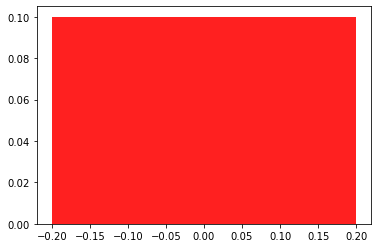

In [26]:
# Set up widgetsm - captions
cap1 = widgets.Label(value='.....Initial Energy')
cap2 = widgets.Label(value='     Add/Removed')
cap3 = widgets.Label(value='.....Final Energy')
cap4 = widgets.Label(value='Object 1:')
cap5 = widgets.Label(value='Force 1:')
cap6 = widgets.Label(value='Force 2:')
cap7 = widgets.Label(value='Spring:')
cap8 = widgets.Label(value='Other Potential:')
cap9 = widgets.Label(value='Net Energy:')


# kinetic energy sliders
KE0=widgets.FloatText(min=0, max=100, value=.1, description = 'Initial KE',continuous_update=False,
                     layout=Layout(width='60%'))
KEf=widgets.FloatText(min=0, max=100, value=.1, description = 'Final KE',continuous_update=False,
                     layout=Layout(width='60%'))

# gravitational energy sliders
PEg10=widgets.FloatText(min=-100, max=100, value=.1, description = 'Initial PE_g',continuous_update=False,
                       layout=Layout(width='60%'))
PEg1f=widgets.FloatText(min=-100, max=100, value=.1, description = 'Final PE_g',continuous_update=False,
                       layout=Layout(width='60%'))

# spring energy sliders
PEs10=widgets.FloatText(min=-100, max=100, value=.1, description = 'Initial PE_s',continuous_update=False,
                       layout=Layout(width='60%'))
PEs1f=widgets.FloatText(min=-100, max=100, value=.1, description = 'Final PE_s',continuous_update=False,
                       layout=Layout(width='60%'))

# Other potential energy sliders - qV for instance
U0=widgets.FloatText(min=-100, max=100, value=.1, description = 'Initial U',continuous_update=False,
                    layout=Layout(width='60%'))
Uf=widgets.FloatText(min=-100, max=100, value=.1, description = 'Final U',continuous_update=False,
                    layout=Layout(width='60%'))

# nonconservative force - energy sliders
WF1=widgets.FloatText(min=-100, max=100, value=.1, description = 'Work F1',continuous_update=False,
                     layout=Layout(width='60%'))
WF2=widgets.FloatText(min=-100, max=100, value=.1, description = 'Work F2',continuous_update=False,
                     layout=Layout(width='60%'))



# An HBox lays out its children horizontally, VBox lays them out vertically
col1 = widgets.VBox([cap1, cap4, KE0, PEg10, cap7, PEs10, cap8, U0])
col2 = widgets.VBox([cap2, cap5, WF1, cap6, WF2])
col3 = widgets.VBox([cap3, cap4, KEf, PEg1f, cap7, PEs1f, cap8, Uf])
panel = widgets.HBox([col1, col2, col3])



out = widgets.interactive_output(energyBar, {'KE0': KE0, 'KEf': KEf,
                                             'PEg10': PEg10,'PEg1f': PEg1f,
                                             'PEs10': PEs10,'PEs1f': PEs1f,
                                             'U0': U0,'Uf': Uf,
                                             'WF1': WF1,'WF2': WF2})

display(out, panel)